### Hello Kagglers!

In this kernel i cover the domain knowledge about this disease, Exploratory data analysis and Images visualisation which are given in .dcm format. The background knowledge plays an important role in data understanding, in analysis & in model building. Here i describe all the basic concepts about **Pulmonary Fibrosis** disease.

### If you like this notebook PLEASE UPVOTE!!



## BACKGROUND KNOWLEDGE:-
Ok, lets starts with some questions...


### 1. What is Pulmonary Fibrosis?

Pulmonary fibrosis is a lung disease that occurs when lung tissue becomes damaged and scarred. This thickened, stiff tissue makes it more difficult for your lungs to work properly. As pulmonary fibrosis worsens, you become progressively more short of breath.

The lung damage caused by pulmonary fibrosis can't be repaired, but medications and therapies can sometimes help ease symptoms and improve quality of life. For some people, a lung transplant might be appropriate.

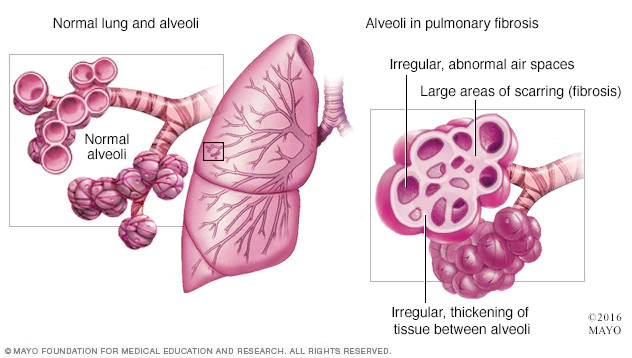

Pulmonary fibrosis scars and thickens the tissue around and between the air sacs (alveoli) in your lungs. This makes it more difficult for oxygen to pass into your bloodstream.




### 2. How it can be detected?

This disease can be detected by following tests:

**Chest X-ray:** A chest X-ray shows images of your chest. This may show the scar tissue typical of pulmonary fibrosis, and it may be useful for monitoring the course of the illness and treatment. However, sometimes the chest X-ray may be normal, and further tests may be required to explain your shortness of breath.

**Computerized tomography (CT) scan:**. CT scanners use a computer to combine X-ray images taken from many different angles to produce cross-sectional images of internal structures in the body. A high-resolution CT scan can be particularly helpful in determining the extent of lung damage caused by pulmonary fibrosis. Also, some kinds of fibrosis have characteristic patterns.

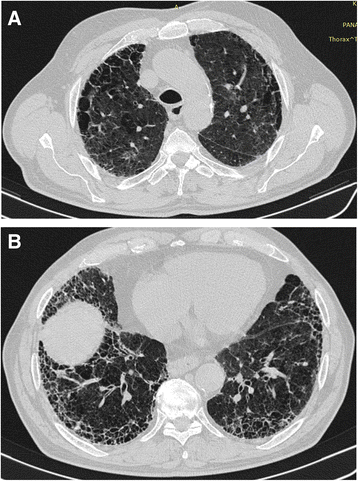

**Echocardiogram:** An echocardiogram uses sound waves to visualize the heart. It can produce still images of your heart's structures, as well as videos that show how your heart is functioning. This test can evaluate the amount of pressure occurring in the right side of your heart.

There are many other tests for the detection but i'm not going to write them all.

Alright, we now know that what the disease is and how it can be treated. But what is **FVC** now? Lets find out...

### 3. What is FVC?

Forced vital capacity (FVC) is the amount of air that can be forcibly exhaled from your lungs after taking the deepest breath possible, as measured by spirometry.

Traditional staging for pulmonary fibrosis is determined by how a patient scores on a forced vital capacity (FVC) test.  The test is a simple one that takes only about three minutes to complete. Patients inhale and then exhale for a sustained period of time into a spirometry device that measures maximal expiration and maximal inspiration (sustained breathing out followed by inhalation).

IPF severity is determined based on spirometry scores. A predicted FVC value of greater than 75% is considered mild, 50% to 75% is considered moderate, 25% to 49% is severe, and less than 25% is deemed very severe.


#### Now we have the basic understanding of the given disease and its related terms. Also we have provided the CT scan images of chest in .dcm format and other data in csv files.In the dataset, we are provided with a baseline chest CT scan and associated clinical information for a set of patients. A patient has an image acquired at time Week = 0 and has numerous follow up visits over the course of approximately 1-2 years, at which time their FVC is measured.We are asked to predict the final three FVC measurements for each patient, as well as a confidence value in your prediction.

## Preliminaries
Now Let's start digging into the data...

In [ ]:
#Basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom

In [ ]:
df_train = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
df_train.head()

#### NOTE: The values of FVC is in mililitres(ml) and the negative values of weeks may be indicating the previous images from week=0.

In [ ]:
df_test = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')
df_test.head()

In [ ]:
df_train.info()

Great!! we haven't any null values in the dataset.Also the data types are corrrect.

In [ ]:
df_train.describe().style.background_gradient(cmap='Blues')

OKK!! Lets now check the uniqueness of the patients in the given dataset.

In [ ]:
df_train.Patient.nunique(), df_test.Patient.nunique()

**WOW!** Guys be ready for the **SHAKE-UPS**...we have provided the data for 176 unique patients and only 5 patients data for testing purpose.

# Exploratory Data Analysis:

Lets do some EDA stuff on the dataset for better understanding.

## 1. Age Column:

In [ ]:
plt.figure(figsize=(15,8))

sns.countplot(x='Age',data=df_train,palette='gist_rainbow')

plt.title('Age Distribution')

plt.show()

The age range of 60 to 75 have more number of cases or they have more number of weekly tests.

## 2. FVC Column:

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(a=df_train['FVC'],color='r')

plt.grid()

plt.title('FVC Distribution')

plt.show()

Most of the people have FVC between 2000 ml to 3500 ml.

## 3. Weeks Distribution:

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='Weeks',data=df_train, palette='hsv_r')
plt.title('Weeks Distribution')
plt.show()

More CT scans are held in between week 5 to week 58 and very less number of cases of this disease after that.

## 4. Smoking Status Column:

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='SmokingStatus',data=df_train, palette='plasma',hue='SmokingStatus')
plt.title('Smoking Status Distribution')
plt.show()

## 5. Percent Column:

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(a= df_train['Percent'], color='purple')
plt.grid()
plt.title('Percent Distribution')
plt.show()

The percent column may be varies with FVC column.We will see it later.

## 6. Sex Vs Smoking Status:

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',data=df_train, palette='hsv',hue='SmokingStatus')
plt.grid()
plt.show()

As expected the Males are ahead in smoking status wheather they are ex-smoker or current.

## 7. FVC Vs Percent:

In [ ]:
plt.figure(figsize=(15,8))

sns.scatterplot(x='FVC',y='Percent',data=df_train,palette='seismic_r',hue='Sex',style='Sex')
plt.show()

Nice! The **PERCENT** and **FVC** columns have a linear relationship because percent column is a computed field which approximates the patient's FVC as a percent of the typical FVC for a person of similar characteristics.

## 8. The Pair Plots Relations:

In [ ]:
a= df_train.groupby(['SmokingStatus','Age','Percent'])['FVC'].mean().reset_index().sort_values(by='FVC',ascending = False)
a.head(20).style.background_gradient(cmap='Purples')

In [ ]:
plt.figure(figsize=(15,15))

sns.pairplot(data=a, hue='SmokingStatus',palette='hsv',height=3,aspect=1)
plt.show()

I think the Percent and FVC column is strongly corelated and more useful the for model.

## 9. FVC Vs Smoking Status:

In [ ]:
b= df_train.groupby(['Sex','SmokingStatus'])['FVC'].mean().reset_index().sort_values(by='FVC',ascending = False)
b.style.background_gradient(cmap='winter_r')

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x='SmokingStatus',y='FVC',data=b,hue='Sex',palette='gist_rainbow_r')
plt.grid()
plt.title('FVC Vs Smoking Status')
plt.show()

## 10. Weekly Distribution Of FVC:

In [ ]:
week= df_train.groupby(['SmokingStatus','Weeks'])['FVC'].mean().reset_index().sort_values(by='FVC',ascending = False)
week.head(20).style.background_gradient(cmap='Oranges')

In [ ]:
plt.figure(figsize=(15,10))

sns.lineplot(x='Weeks',y='FVC',data=week,hue='SmokingStatus',style='SmokingStatus',markers=['*','o','^'])
plt.grid()
plt.title('Weekly Distribution Of FVC')
plt.show()

## 11. Age-wise Distribution Of FVC:

In [ ]:
plt.figure(figsize=(15,9))

sns.scatterplot(x='Age',y='FVC',data=df_train,palette='seismic_r',hue='Sex',style='Sex')
plt.title('Age-wise Distribution Of FVC')
plt.show()

## 12. Age-wise Distribution Of Percent:

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age',y='Percent',data=df_train,palette='hsv',hue='Sex',style='Sex')
plt.title('Age-wise Distribution Of Percent')
plt.show()

## 13. Age Vs Smoking Status:

In [ ]:
plt.figure(figsize=(15,9))
sns.violinplot(x='SmokingStatus',y='Age',data=df_train,palette='gist_rainbow_r',hue='Sex',split=True,saturation=1)
plt.title('Age vs Smoking Status')
plt.show()

# IMAGE ANALYSIS:

Lets analysis some of the given images of CT scans.

## Single Image:

In [ ]:

path = '../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/10.dcm'
img = pydicom.dcmread(path)
plt.figure(figsize=(6,6))
plt.imshow(img.pixel_array,cmap='Greys_r')
img



## Images For A Particular Patient:

In [ ]:
path = '../input/osic-pulmonary-fibrosis-progression/train/ID00025637202179541264076/'

plt.figure(figsize=(15,15))
for i in range(1,21):
    file = path + str(i) + '.dcm'
    plt.subplot(5,4,i)
    img = pydicom.dcmread(file)
    plt.imshow(img.pixel_array,cmap='Greys_r')
    



### Observations:

* There is a variation in the images of CT scans for a particular patient.
* Image augmentation can be applied for better results of the model.
* It may be difficult to make model on only image basis.

These are only mey guesses and you are feel free to give suggestions.


# WHAT'S NEXT:

I will try to update this kernel as soon as i got some new infromation and in future i'll surely do these things:

* Improved Visualizations
* Build the model
* Image augmentation

As i am a beginner too in this feild and tried to learn somthing new daily. I make this kernel beginner friendly and update it as i get some new info.

I hpoe you like my work. **PLEASE UPVOTE** to keep me motivated to write more.

**Thank You**